`Chapter 4 -- Plotting and Visualization`

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

Getting started

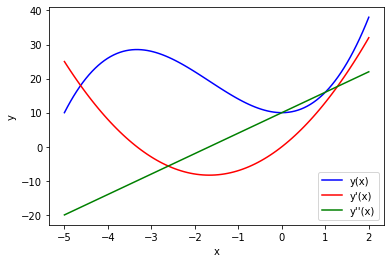

In [2]:
x = np.linspace(-5,2,100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig, ax = plt.subplots()
ax.plot(x,y1, color="blue", label="y(x)")
ax.plot(x,y2, color="red", label="y'(x)")
ax.plot(x,y3, color="green", label="y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Figure

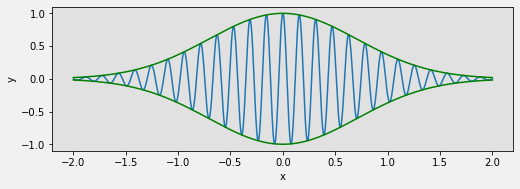

In [3]:
fig = plt.figure(figsize=(8,2.5),facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1,0.1,0.8,0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2,2,1000)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

ax.plot(x,y1*y2)
ax.plot(x,y2,"g")
ax.plot(x,-y2,"g")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

Line properties

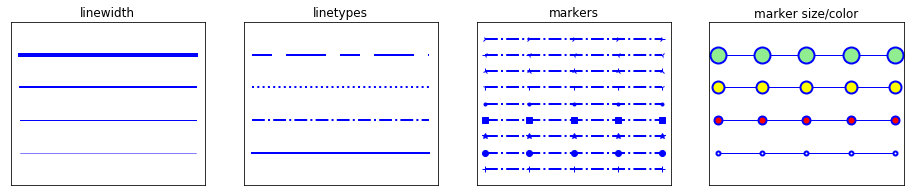

In [18]:
x = np.linspace(-5,5,5)
y = np.ones_like(x)

def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0,ymax+1)
    ax.set_title(title)

fig,axes = plt.subplots(1,4, figsize=(16,3))
# Line width
linewidths = [0.5,1.0,2.0,4.0]

for n, linewidth in enumerate(linewidths):
    axes[0].plot(x,y+n, color="blue",linewidth=linewidth)
    
axes_settings(fig,axes[0],"linewidth",len(linewidths))
# Line style
linestyles = ['-','-.',':']

for n, linestyle in enumerate(linestyles):
    axes[1].plot(x,y+n,color="blue",lw=2,linestyle=linestyle)
# custom dash style

line, = axes[1].plot(x,y+3,color="blue",lw=2)
length1,gap1,length2, gap2 = 10,7,20,7
line.set_dashes([length1,gap1,length2,gap2])

axes_settings(fig,axes[1],"linetypes",len(linestyles)+1)
# marker types
markers = ['+','o','*','s','.','1','2','3','4']

for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    axes[2].plot(x, y+n, color="blue", lw=2, ls='dashdot', marker=marker)
    
axes_settings(fig,axes[2],"markers",len(markers))
# marker size and color
markersizecolors = [(4,"white"),(8,"red"),(12,"yellow"),(16,"lightgreen")]
for n, (markersize,markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x,y+n, color="blue", lw=1, ls='-', marker='o',markersize=markersize,\
                markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

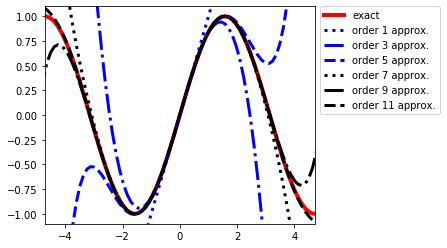

In [19]:
# a symbolic variable for x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2*np.pi, 2*np.pi, 100)
def sin_expansion(x,n):
    """
    Evaluate the nth order Taylor series expansion of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x,sympy.sin(sym_x).series(n=n+1).removeO(),'numpy')(x)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=4, color="red", label="exact")

colors = ["blue","black"]
linestyles = [':','-.','--']
for idx, n in enumerate(range(1,12,2)):
    ax.plot(x,sin_expansion(x,n), color=colors[idx//3], linestyle=linestyles[idx%3],\
           linewidth=3, label="order %d approx." %n)

ax.set_ylim(-1.1,1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)

# place a legend outside of the axes
ax.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)

Text formating and annotations

Text(2, 0.1, 'Equation: $i\\hbar\\partial_t \\Psi = \\hat{H}\\Psi$')

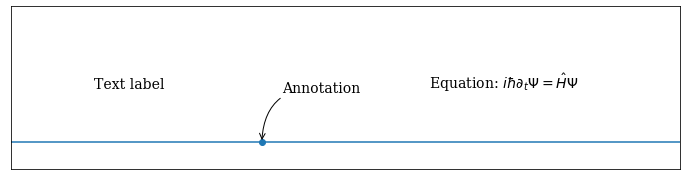

In [33]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5,3.5)
ax.set_ylim(-0.05,0.25)
ax.axhline(0)
# text label
ax.text(0,0.1,"Text label", fontsize=14, family="serif")
# annotation
ax.plot(1,0,"o")
ax.annotate("Annotation",fontsize=14,family="serif",xy=(1,0),xycoords="data",xytext=(+20,+50),\
            textcoords="offset points",arrowprops=dict(arrowstyle="->",connectionstyle="arc3, rad=0.5"))
# equation
ax.text(2,0.1,r'Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$',fontsize=14,family="serif")

Axis labels and titles

Text(0.5, 1.0, 'axis labels and title example')

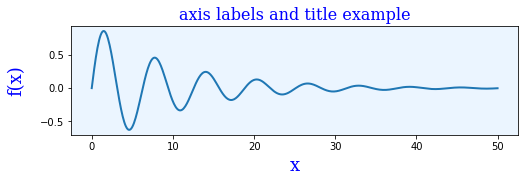

In [35]:
x = np.linspace(0,50,500)
y = np.sin(x)*np.exp(-x/10)

fig, ax = plt.subplots(figsize=(8,2),subplot_kw={'facecolor': "#ebf5ff"})
ax.plot(x,y,lw=2)
ax.set_xlabel("x",labelpad=5,fontsize=18,fontname='serif',color="blue")
ax.set_ylabel("f(x)",labelpad=15,fontsize=18,fontname='serif',color='blue')
ax.set_title("axis labels and title example",fontsize=16,fontname='serif',color='blue')

Axis range

Text(0.5, 1.0, "axis('equal')")

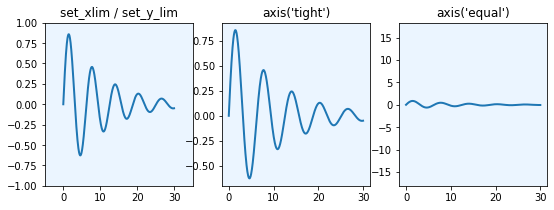

In [36]:
x = np.linspace(0,30,500)
y = np.sin(x)*np.exp(-x/10)

fig, axes = plt.subplots(1,3,figsize=(9,3),subplot_kw={'facecolor':"#ebf5ff"})

axes[0].plot(x,y,lw=2)
axes[0].set_xlim(-5,35)
axes[0].set_ylim(-1,1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x,y,lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x,y,lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")


Axis ticks, tick labels, and grids

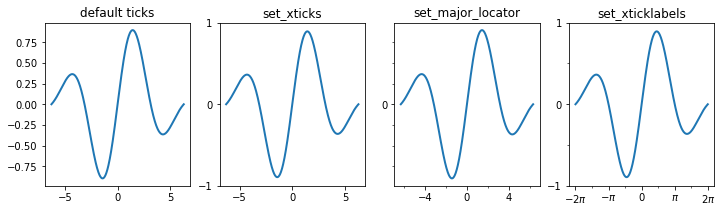

In [38]:
import matplotlib as mpl

x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = np.sin(x)*np.exp(-x**2/20)

fig, axes = plt.subplots(1,4, figsize=(12,3))

axes[0].plot(x,y,lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x,y,lw=2)
axes[1].set_title("set_xticks")
axes[1].set_yticks([-1,0,1])
axes[1].set_xticks([-5,0,5])

axes[2].plot(x,y,lw=2)
axes[2].set_title("set_major_locator")
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1,0,1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

axes[3].plot(x,y,lw=2)
axes[3].set_title("set_xticklabels")
axes[3].set_yticks([-1,0,1])
axes[3].set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
axes[3].set_xticklabels(['$-2\pi$','$-\pi$',0,r'$\pi$',r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([-3*np.pi/2,-np.pi/2,0,np.pi/2,3*np.pi/2])
axes[3].xaxis.set_minor_locator(x_minor_ticker)
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))

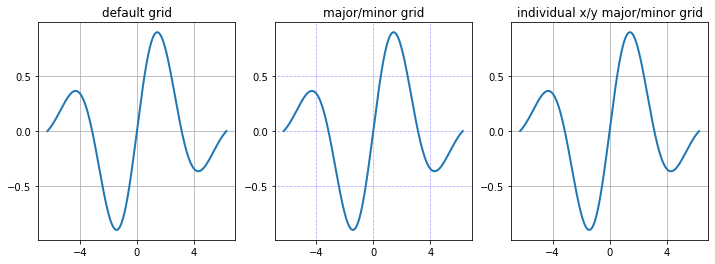

In [39]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(4)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x,y,lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    
axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color='blue',which='both',linestyle=':',linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color='grey', which='major', axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color='grey', which='minor', axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color='grey', which='major', axis='y', linestyle='-', linewidth=0.5)